In [156]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import sklearn.cross_validation
import sklearn.tree
import sklearn.metrics
import sklearn.dummy
import sklearn.grid_search

import StringIO
import pydot
import IPython.display

In [43]:
phonecase = pd.read_csv("../../SYD_DAT_5/data/phonecase.csv")

In [44]:
classifier = sklearn.tree.DecisionTreeClassifier(criterion='gini', max_depth=3)

In [45]:
X = phonecase[['Income', 'Age']]
y = phonecase[['Colour']]

In [46]:
split_stuff = sklearn.cross_validation.train_test_split(X, y)

In [47]:
split_stuff[0]

,Income,Age
9,40000,25
2,0,15
11,80000,30
17,30000,65
4,10000,18
10,100000,27
0,0,12
16,60000,63
15,40000,62
6,0,21


In [48]:
X_train, X_test, y_train, y_test = split_stuff

In [49]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

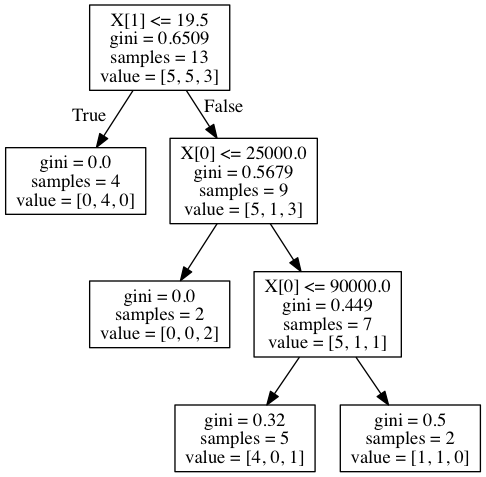

In [50]:
s  = StringIO.StringIO()
sklearn.tree.export_graphviz(classifier, out_file=s)
grph = pydot.graph_from_dot_data(s.getvalue())
IPython.display.Image(grph.create_png())

In [51]:
y_predict = classifier.predict(X_test)

In [52]:
sklearn.metrics.accuracy_score(y_test, y_predict)

0.20000000000000001

In [56]:
dumb = sklearn.dummy.DummyClassifier(strategy='constant', constant='Yellow')
dumb.fit(X_train, y_train)
dumb_prediction = dumb.predict(X_test)

In [57]:
sklearn.metrics.accuracy_score(y_test, dumb_prediction)

0.59999999999999998

In [58]:










# using k-folds method










In [59]:
phonecase

,Age,Income,Colour
0,12,0,Red
1,14,10,Red
2,15,0,Red
3,17,500,Yellow
4,18,10000,Red
5,19,30000,Yellow
6,21,0,Yellow
7,21,20000,Yellow
8,23,30000,Yellow
9,25,40000,Pink


In [104]:
train = phonecase.drop([17, 8, 12])

In [105]:
#test = phonecase[(phonecase.index == 17) | (phonecase.index == 8) | (phonecase.index == 12)]
phonecase.loc[[17,8,12],:]

,Age,Income,Colour
17,65,30000,Pink
8,23,30000,Yellow
12,40,150000,Red


In [106]:
X_train = train[['Age','Income']]
y_train = train[['Colour']]
X_test = test[['Age','Income']]
y_test = test[['Colour']]

In [107]:
classifier = sklearn.tree.DecisionTreeClassifier(criterion='gini', max_depth=3)
classifier.fit(X_train, y_train)
y_dtpred = classifier.predict(X_test)

In [108]:
sklearn.metrics.accuracy_score(y_test, y_dtpred)

0.33333333333333331

In [109]:
y_dtpred

array(['Yellow', 'Pink', 'Yellow'], dtype=object)

In [116]:
# there is an sklearn module for doing k fold cross validation

In [155]:
sklearn.cross_validation.cross_val_score(classifier, X, y.Colour, cv=6, scoring='accuracy').mean()

0.5

In [ ]:
# using grid search to find optimal parameters:

In [177]:
params = {'max_depth': range(1,21), 'criterion': ['gini', 'entropy'], 'max_features': [1,2]}
fresh_classifier = sklearn.tree.DecisionTreeClassifier()
brute_force = sklearn.grid_search.GridSearchCV(fresh_classifier, params, cv=6)

In [178]:
brute_force.fit(X,y.Colour)

GridSearchCV(cv=6, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 2], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [179]:
brute_force.best_params_

{'criterion': 'gini', 'max_depth': 2, 'max_features': 2}

In [180]:
brute_force.best_score_

0.61111111111111116